# Problem :

IMDB movie review sentiment classification problem. Each movie review is a variable sequence of words and the sentiment of each movie review must be classified. The IMDB Movie Review Dataset contains 25,000 highly-polar movie reviews (good or bad) for training and the same amount again for testing. The problem is to determine whether a given movie review has a positive or negative sentiment. Keras provides access to the IMDB dataset built-in. The imdb.load_data() function allows you to load the dataset in a format that is ready for use in neural network and deep learning models. The words have been replaced by integers that indicate the ordered frequency of each word in the dataset. The sentences in each review are therefore comprised of a sequence of integers.

# Why CNN with LSTM for text Classifcation

CNNs are generally used in computer vision, however they’ve recently been applied to various NLP tasks and the results were promising.
Let’s briefly see what happens when we use CNN on text data through a diagram.The result of each convolution will fire when a special pattern is detected. By varying the size of the kernels and concatenating their outputs, you’re allowing yourself to detect patterns of multiples sizes (2, 3, or 5 adjacent words).Patterns could be expressions (word ngrams?) like “I hate”, “very good” and therefore CNNs can identify them in the sentence regardless of their position.
Recurrent neural networks can obtain context information but the order of words will lead to bias; the text analysis method based on Convolutional neural network (CNN) can obtain important features of text through pooling but it is difficult to obtain contextual information which can be leverage using LSTM. So using the combination of CNN with LSTM could give us some intresting results

# Develop an text classification model based on CNN + LSTM in Keras.

In this assignment, you will have to train two Text classification:
1) LSTM based Text Classification
2) CNN + LSTM based Text Classification

After training the two different classification, you have to compare the accuracy on both of the model trained and report the best accuracy for which of them.

This notebook is divided into six parts. Total : [8 Marks]

1. Import the required Libraires [1 Mark]
2. Implement the LSTM model [2 Marks]
3. Calculate the LSTM model accuracy [1 Mark]
4. Implement the CNN + LSTM [3 Marks]
5. Calculate the CNN + LSTM model accuracy [1 Mark]

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import imdb

#import the required library

# Student will have to code here
from keras.models import Sequential
from keras.layers import Dense,MaxPooling1D
from keras.layers import LSTM, Flatten, Dropout, Conv1D
# from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import Embedding
from keras.preprocessing import sequence
from keras.utils import pad_sequences
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Students will end their code here

# load the dataset

In [43]:
# load the dataset but only keep the top n words, zero the rest
top_words = 10000

import numpy as np

np.load.__defaults__=(None, True, True, 'ASCII')

# call load_data with allow_pickle implicitly set to true
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size = 0.2)
print("Shape of train data:", X_train.shape)
print("Shape of Test data:", X_test.shape)
print("Shape of CV data:", X_cv.shape)

# truncate and pad input sequences
max_review_length = 600
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)
X_cv = pad_sequences(X_cv,maxlen=max_review_length)

Shape of train data: (20000,)
Shape of Test data: (25000,)
Shape of CV data: (5000,)


In [44]:
y_train[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

# Decoding the data coded data of IMDB ( Data Understanding )

In [45]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X_train[0]] )
print(decoded) 

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # i just finished watching this movie and i found it was basically just not funny at all br br

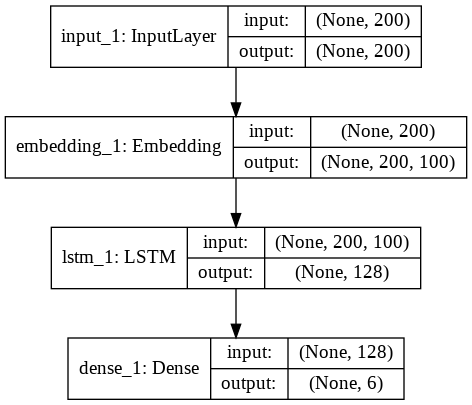

In [46]:
# Architecture Diagram for LSTM Based Classifcation but you will have to change the
# configuration/model parameters while implementing it depending on the input , output and the 
# Problem statement.

from IPython.display import Image
Image(filename='LSTM_model.png')

# Adding code in below cell for LSTM based classification with embedding layer, hyperparameter and dense layer for 5 epochs(More no of epoch taking long time hence running with 5)

In [47]:
import tensorflow as tf

embedding_vector_length = 32
model = tf.keras.Sequential()

# Write the code for LSTM Based Classifcation
# Embedding layer
# LSTM Layer : You are free to choose the hyperparameters and the number of layers
# Dense Layer

# Students will be starting their code from here:

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=top_words, output_dim=embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(units=1, activation='sigmoid'))

# Students will be ending their code here

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

# Change the number of epochs and the batch size depending on the RAM Size

# epochs=10
out = model.fit(X_train, y_train, epochs=5, batch_size=64,verbose = 1,validation_data=(X_cv,y_cv))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 600, 32)           320000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               53200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
313/313 [==============================] - 560s 2s/step - loss: 0.4466 - accuracy: 0.7882 - val_loss: 0.3203 - val_accuracy: 0.8712
Epoch 2/5
313/313 [==============================] - 289s 923ms/step - loss: 0.2633 - accuracy: 0.8952 - val_loss: 0.3126 - val_accuracy: 0.8780
Epoch 3/5
313/313 [=

In [48]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

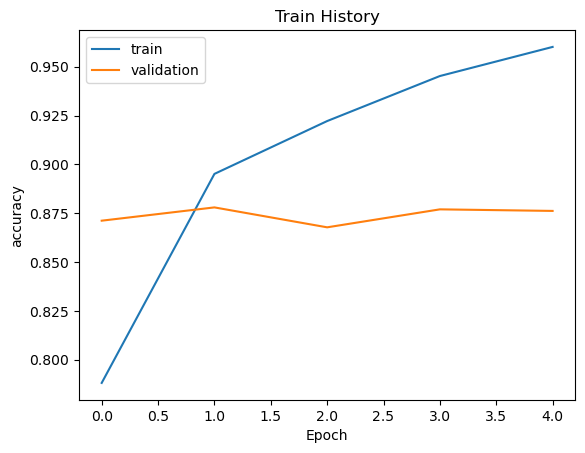

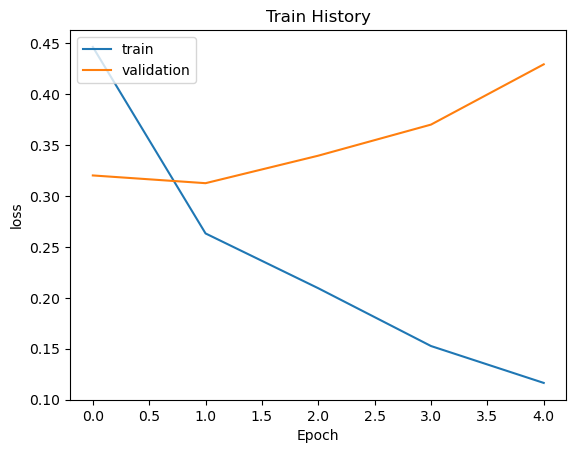

In [49]:
show_train_history(out,'accuracy','val_accuracy')
show_train_history(out,'loss','val_loss')

# Accuracy and Loss plot using LSTM

In [50]:
print('Training loss \t', out.history['loss'][-1]*100)
print('Training accuracy ',  out.history['accuracy'][-1]*100)
print('Validation loss ', out.history['val_loss'][-1]*100)
print('Validation accuracy ',  out.history['val_accuracy'][-1]*100)

Training loss 	 11.634727567434311
Training accuracy  96.01500034332275
Validation loss  42.945653200149536
Validation accuracy  87.6200020313263


In [51]:
# Final evaluation of the model using test dataset
# Students will be starting their code from here:

scores = model.evaluate(X_test, y_test, verbose=1)
print('Testing loss \t', scores[0]*100)
print('Testing accuracy ', scores[1]*100)

782/782 [==============================] - 64s 81ms/step - loss: 0.4685 - accuracy: 0.8633
Testing loss 	 46.84517979621887
Testing accuracy  86.32799983024597


In [52]:
predict = model.predict(X_test)
predict_classes =np.argmax(predict, axis=1)

782/782 [==============================] - 60s 77ms/step


In [53]:
#Looking at teh model and capturing the F1 Score.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,f1_score
y_pred1= model.predict(X_test)

print(confusion_matrix(y_test,y_pred1>0.5))


782/782 [==============================] - 60s 77ms/step
[[11035  1465]
 [ 1953 10547]]


# Classification report for model1

In [54]:
print(classification_report(y_test,(y_pred1>0.5)))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87     12500
           1       0.88      0.84      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



# F1 Score for model1

In [55]:
f1_lstm = f1_score(y_test, y_pred1>0.5,average='macro')
f1_lstm

0.8632278856665667

In [56]:
def get_original_text(i):
    word_to_id = imdb.get_word_index()
    word_to_id = {k:(v+3) for k,v in word_to_id.items()}
    word_to_id["<PAD>"] = 0
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2

    id_to_word = {value:key for key,value in word_to_id.items()}
    return ' '.join(id_to_word[id] for id in X_test[i])

In [57]:
SentimentDict={1:'positive', 0:'negative'}
def display_test_sentiment(i):
    print(get_original_text(i))
    print('label: ', SentimentDict[y_test[i]], ', prediction: ', SentimentDict[predict_classes[i]])
display_test_sentiment(3)

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

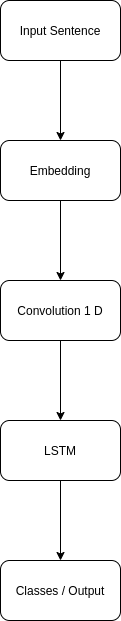

In [58]:
# High Level Model Architecture
from IPython.display import Image
Image(filename='1_VGtBedNuZyX9E-07gnm2Yg.png')

# CNN Model for 5 epochs (More no of epoch taking long time hence running with 5):-

In [59]:
# create the model
embedding_vector_length = 32
cnn_model = Sequential()

# Students will be starting their code from here:

# Write the code for LSTM Based Classifcation
# Embedding layer
# Convolution-1D Layer : You are free to choose the hyperparameters and the number of layers
# LSTM Layer : You are free to choose the hyperparameters and the number of layers
# Dense Layer

cnn_model.add(Embedding(input_dim=top_words, output_dim=embedding_vector_length, input_length=max_review_length))
cnn_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(LSTM(100))
cnn_model.add(Dense(units=1, activation='sigmoid'))

# Students will be ending their code here

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(cnn_model.summary())

# Change the number of epochs and the batch size depending on the RAM Size

out_c = cnn_model.fit(X_train, y_train, epochs=5, batch_size=64,verbose = 1,validation_data=(X_cv,y_cv))


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 600, 32)           320000    
                                                                 
 conv1d_1 (Conv1D)           (None, 600, 32)           3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 300, 32)          0         
 1D)                                                             
                                                                 
 lstm_3 (LSTM)               (None, 100)               53200     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 376,405
Trainable params: 376,405
Non-trainable params: 0
________________________________________________

# Final evaluation of the CNN + RNN model using the test data

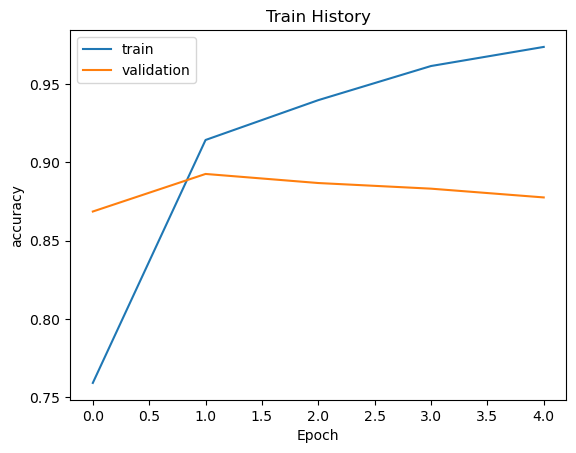

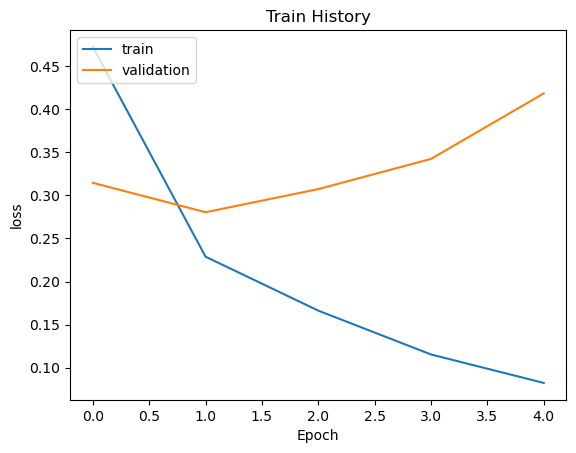

In [60]:
# Students will be starting their code from here:

show_train_history(out_c,'accuracy','val_accuracy')
show_train_history(out_c,'loss','val_loss')

# Accuracy and loss plot for CNN model

In [61]:
print('Training loss \t', out_c.history['loss'][-1]*100)
print('Training accuracy ',  out_c.history['accuracy'][-1]*100)
print('Validation loss ', out_c.history['val_loss'][-1]*100)
print('Validation accuracy ',  out_c.history['val_accuracy'][-1]*100)

Training loss 	 8.239153772592545
Training accuracy  97.37499952316284
Validation loss  41.835781931877136
Validation accuracy  87.76000142097473


In [62]:
cnn_scores = cnn_model.evaluate(X_test, y_test, verbose=1)
print('Testing loss \t', scores[0]*100)
print('Testing accuracy ', scores[1]*100)

782/782 [==============================] - 34s 43ms/step - loss: 0.4529 - accuracy: 0.8672
Testing loss 	 46.84517979621887
Testing accuracy  86.32799983024597


In [63]:
#Looking at teh model and capturing the F1 Score.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,f1_score
y_pred2= cnn_model.predict(X_test)

print(confusion_matrix(y_test,y_pred2>0.5))


782/782 [==============================] - 34s 43ms/step
[[11157  1343]
 [ 1976 10524]]


# Classification report for CNN model

In [64]:
print(classification_report(y_test,(y_pred2>0.5)))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     12500
           1       0.89      0.84      0.86     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



# F1 Score for Model2

In [65]:
f1_cnn = f1_score(y_test, y_pred2>0.5,average='macro')
f1_cnn

0.8671548326443799

# Creating a dataframe to draw out F1-Score comparisons

In [66]:
import pandas as pd
data = [ ('CNN Model',  f1_lstm),
         (' CNN+LSTM Model ',f1_cnn  )
        
         ]

Scores =pd.DataFrame(data = data, columns=['Model Name', 'F1-Score']) 
Scores.set_index('Model Name', inplace = True)


# Fl Scores for both Models

In [67]:
Scores

,F1-Score
Model Name,
CNN Model,0.863228
CNN+LSTM Model,0.867155


# F1-Scores comparisons

<AxesSubplot:xlabel='Model Name'>

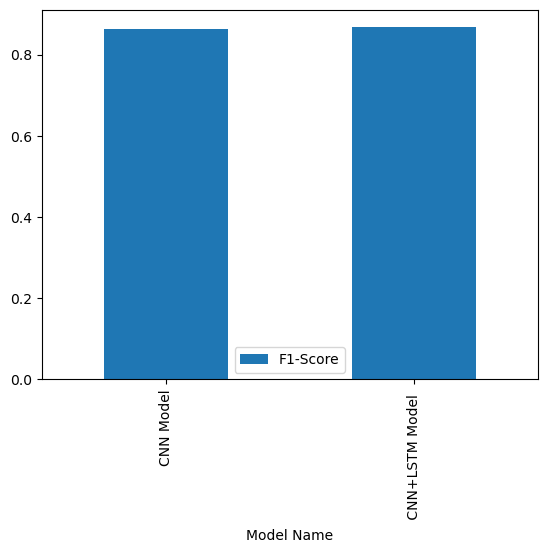

In [68]:
Scores.plot(kind='bar')

# Comparing accuracy of the models(LSTM , CNN+LSTM) :-

# # Creating a function to display values:-

In [69]:

def show_values_on_bars(axs, h_v="v", space=0.2):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = "{:.2f}".format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = "{:.2f}".format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Creating a dataframe to draw out comparisons

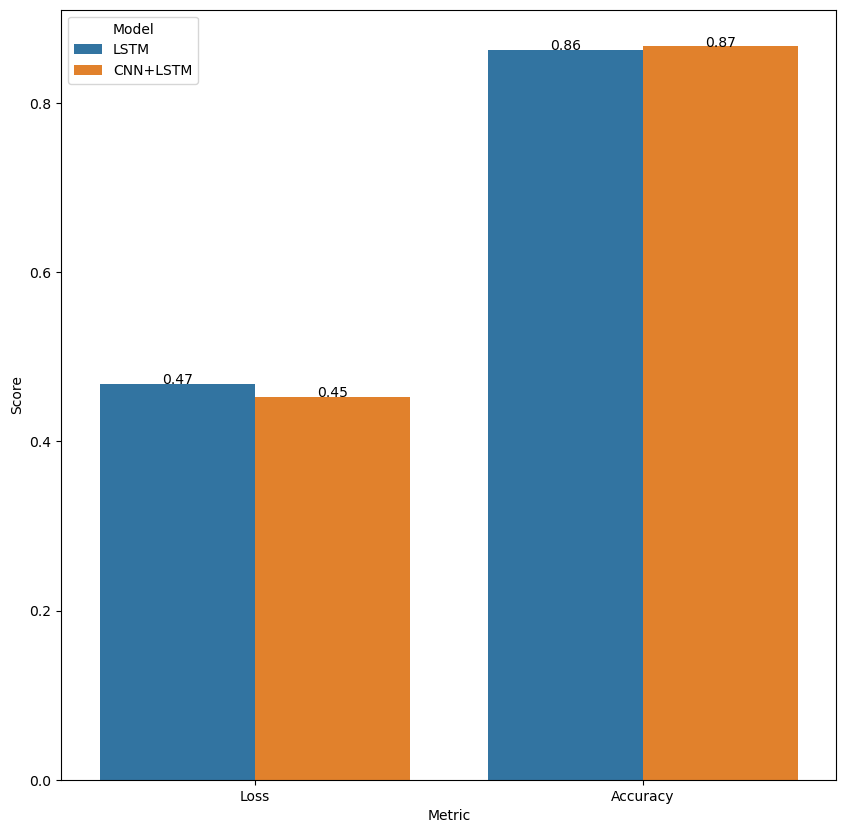

In [70]:
import seaborn as sns
import pandas as pd

results=[]
results.append([scores[0], 'Loss', 'LSTM'])
results.append([scores[1], 'Accuracy', 'LSTM'])
results.append([cnn_scores[0], 'Loss', 'CNN+LSTM'])
results.append([cnn_scores[1], 'Accuracy', 'CNN+LSTM'])


comparison = pd.DataFrame(results, columns = ['Score', 'Metric', 'Model'])

plt.figure(figsize=(10,10))
plot = sns.barplot(x=comparison['Metric'],y=comparison['Score'], hue = comparison['Model'])

show_values_on_bars(plot)

# Conclusion:-

# We see that there is no noticeable change in performance when we have  However the loss is less than 6 % in the model 1 when compared with CNN+ LTSM.

# From the Sklearn metrics , we can see the below :

# LTSM Accuracy is 86 % and has an F1 Score of 0.863228

# LTSM+CNN Has a accuracy of 87 % with an F1 Score of 0.867155

# LSTM+CNN model is better